In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import collections
from scipy.stats import zscore
#add other imports as needed

In [47]:
import os

In [48]:
import platform

# Set file location based on platform. 
platstring = platform.platform()
if ('Darwin' in platstring) or ('macOS' in platstring):
    # macOS 
    data_root = "/Volumes/TReND2024/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn' in platstring):
    # then on Code Ocean
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/TReND2024/"

In [49]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

manifest_file = os.path.join(data_root,'allen-brain-observatory/visual-coding-2p/manifest.json')

boc = BrainObservatoryCache(manifest_file=manifest_file)

In [50]:
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

manifest_path = os.path.join(data_root,'allen-brain-observatory/visual-coding-neuropixels/ecephys-cache/manifest.json') 

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [51]:
areas = boc.get_all_targeted_structures()
areas

['VISal', 'VISam', 'VISl', 'VISp', 'VISpm', 'VISrl']

In [52]:
cre_lines = boc.get_all_cre_lines()
cre_lines

['Cux2-CreERT2',
 'Emx1-IRES-Cre',
 'Fezf2-CreER',
 'Nr5a1-Cre',
 'Ntsr1-Cre_GN220',
 'Pvalb-IRES-Cre',
 'Rbp4-Cre_KL100',
 'Rorb-IRES2-Cre',
 'Scnn1a-Tg3-Cre',
 'Slc17a7-IRES2-Cre',
 'Sst-IRES-Cre',
 'Tlx3-Cre_PL56',
 'Vip-IRES-Cre']

In [53]:
imaging_depths = boc.get_all_imaging_depths()
imaging_depths

[175,
 185,
 195,
 200,
 205,
 225,
 250,
 265,
 275,
 276,
 285,
 300,
 320,
 325,
 335,
 350,
 365,
 375,
 390,
 400,
 550,
 570,
 625]

In [54]:
visual_area = [areas[3]]
cre_line = [cre_lines[1]]
imaging_depth = imaging_depths[:7]

In [55]:
#create an empty dataframe with colums as areas and index as cre_lines
df = pd.DataFrame(columns=areas,index=cre_line)

#populate the dataframe with the number of experiment containers for each combination
for area in areas:
    exps = boc.get_experiment_containers(targeted_structures=[area],cre_lines=cre_line,imaging_depths=imaging_depth)
    df[area].loc[cre_line] = len(exps)

df['Total'] = df.sum(axis=1).astype(int)

#look at dataframe
print(df)

              VISal VISam VISl VISp VISpm VISrl  Total
Emx1-IRES-Cre     2     1    5    3     2     4     17


In [56]:
exps = boc.get_experiment_containers(targeted_structures=visual_area,cre_lines=cre_line,imaging_depths=imaging_depth)
pd.DataFrame(exps)

,id,imaging_depth,targeted_structure,cre_line,reporter_line,donor_name,specimen_name,tags,failed
0,517328083,175,VISp,Emx1-IRES-Cre,Ai93(TITL-GCaMP6f),237706,Emx1-IRES-Cre;Camk2a-tTA;Ai93-237706,[Epileptiform Events],False
1,536323956,175,VISp,Emx1-IRES-Cre,Ai93(TITL-GCaMP6f),252174,Emx1-IRES-Cre;Camk2a-tTA;Ai93(MG)-252174,[],False
2,543677425,175,VISp,Emx1-IRES-Cre,Ai93(TITL-GCaMP6f),260936,Emx1-IRES-Cre;Camk2a-tTA;Ai93-260936,[],False


In [57]:
experiment_container_ids = [exps[0]['id']]

In [58]:
sessions = boc.get_ophys_experiments(experiment_container_ids=experiment_container_ids, stimuli=['natural_scenes'])
sessions

[{'id': 526928092,
  'imaging_depth': 175,
  'targeted_structure': 'VISp',
  'cre_line': 'Emx1-IRES-Cre',
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'acquisition_age_days': 143,
  'experiment_container_id': 517328083,
  'session_type': 'three_session_B',
  'donor_name': '237706',
  'specimen_name': 'Emx1-IRES-Cre;Camk2a-tTA;Ai93-237706',
  'fail_eye_tracking': False}]

In [59]:
session_id = sessions[0]['id']
session_id

526928092

In [60]:
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)

In [61]:
events = boc.get_ophys_experiment_events(ophys_experiment_id=session_id)
events.shape

(149, 114099)

In [62]:
stim_table = data_set.get_stimulus_table('natural_scenes')
stim_table.start

0       16124
1       16132
2       16139
3       16147
4       16154
        ...  
5945    96263
5946    96271
5947    96278
5948    96286
5949    96293
Name: start, Length: 5950, dtype: int64

In [63]:
(stim_table.end-stim_table.start != 7).sum()

234

In [64]:
stim_start = stim_table.start.min()
stim_end = stim_table.end.max()+1

In [65]:
stim_table.end = stim_table.end - stim_start
stim_table.start = stim_table.start - stim_start

In [66]:
stim_table


,frame,start,end
0,8,0,7
1,110,8,15
2,117,15,22
3,105,23,30
4,57,30,37
...,...,...,...
5945,58,80139,80146
5946,87,80147,80154
5947,4,80154,80161
5948,9,80162,80169


In [68]:
stim_epoch = data_set.get_stimulus_epoch_table()
stim_epoch

,stimulus,start,end
0,static_gratings,737,15218
1,natural_scenes,16124,30605
2,spontaneous,30755,39654
3,natural_scenes,39655,54135
4,static_gratings,55041,69528
5,natural_movie_one,70434,79483
6,natural_scenes,80388,96301
7,static_gratings,97583,113873


Text(0.5, 0, 'Aquisition frames')

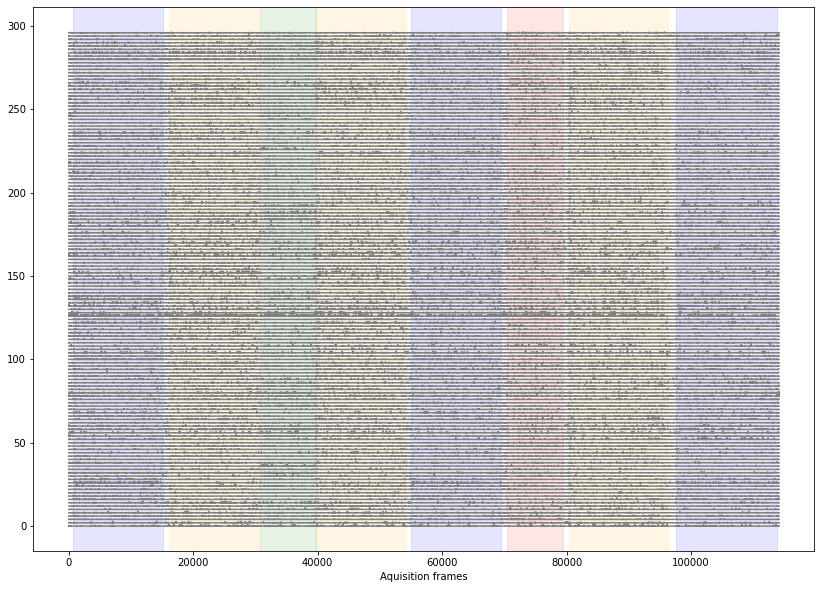

In [91]:
fig = plt.figure(figsize=(14,10))
for i in range(149):
    plt.plot(events[i,:]+(i*2), color='gray')

    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)
        
plt.xlabel("Aquisition frames")

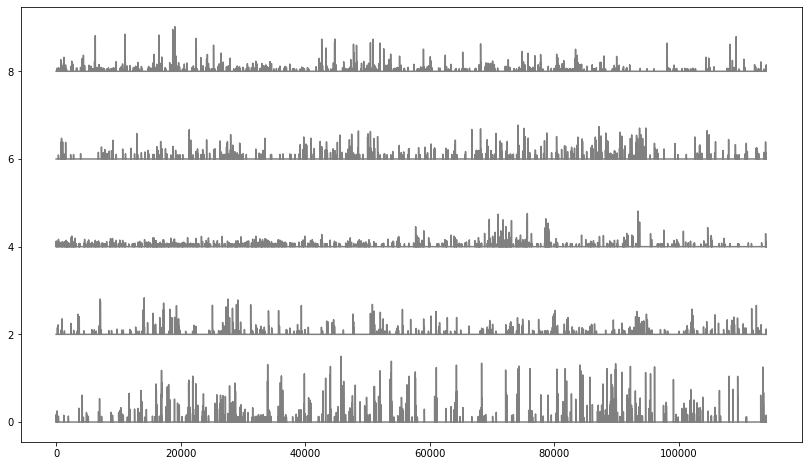

In [92]:
fig = plt.figure(figsize=(14,8))
for i in range(5):
    plt.plot(events[i,:]+(i*2), color='gray')

In [71]:
natural_scene_table = data_set.get_stimulus_table('natural_scenes')

In [72]:
natural_scene_table.head()

,frame,start,end
0,8,16124,16131
1,110,16132,16139
2,117,16139,16146
3,105,16147,16154
4,57,16154,16161


In [73]:
natural_scene_table.end - natural_scene_table.start

0       7
1       7
2       7
3       7
4       7
       ..
5945    7
5946    7
5947    7
5948    7
5949    8
Length: 5950, dtype: int64

In [88]:
natural_scene_template = data_set.get_stimulus_template('natural_scenes')

In [75]:
natural_scene_template.shape

(118, 918, 1174)

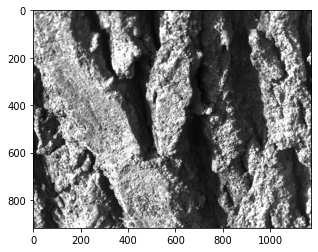

In [82]:
scene_number = 76
plt.imshow(natural_scene_template[scene_number,:,:], cmap='gray')

In [93]:
events_thresh = np.where(events>0.2, 1, 0)

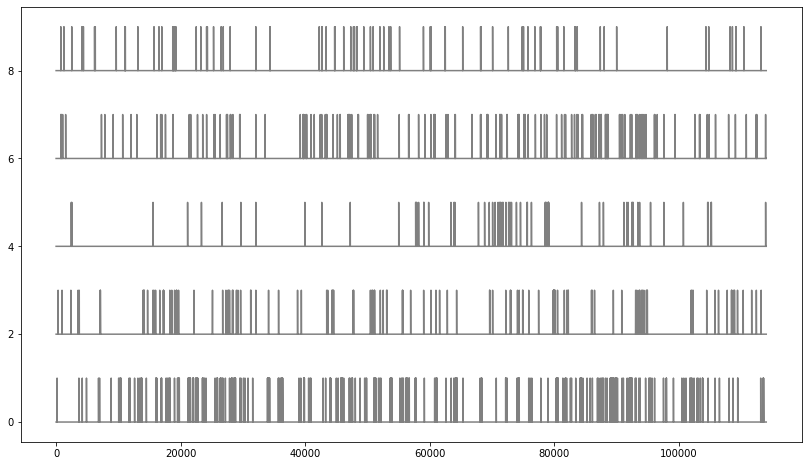

In [96]:
fig = plt.figure(figsize=(14,8))
for i in range(5):
    plt.plot(events_thresh[i,:]+(i*2), color='gray')

Text(0.5, 0, 'Aquisition frames')

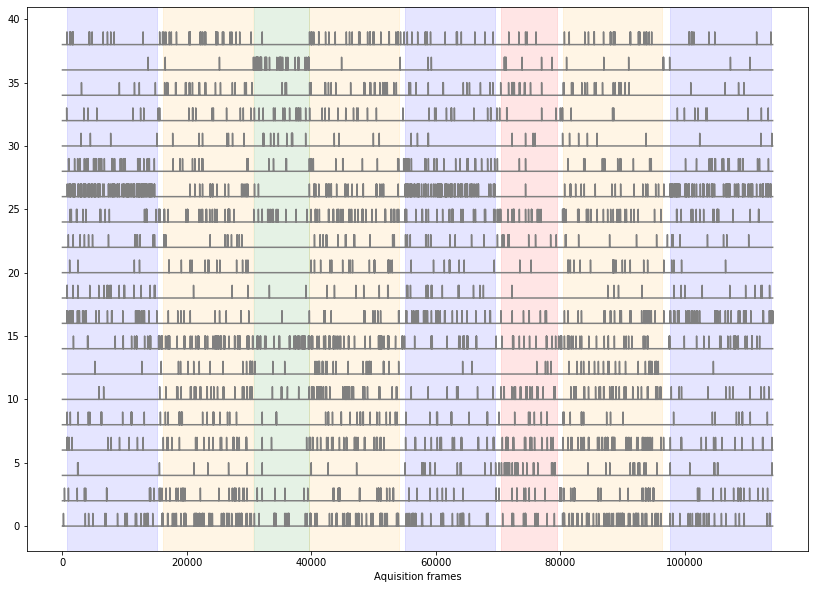

In [99]:
fig = plt.figure(figsize=(14,10))
for i in range(20):
    plt.plot(events_thresh[i,:]+(i*2), color='gray')

    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)
        
plt.xlabel("Aquisition frames")

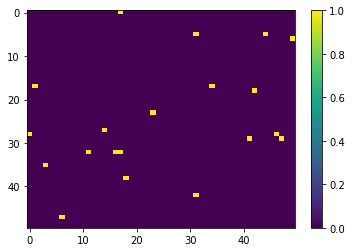

In [95]:
plt.imshow(cell_mat,vmax=1,interpolation='nearest',aspect='auto')
plt.colorbar()